In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import numpy as np 
from yellowbrick.regressor import ResidualsPlot
dados = pd.read_csv('mt_cars.csv')

In [15]:
dados = dados.drop(['Unnamed: 0'], axis=1)

In [16]:
print(dados.shape)

(32, 11)


In [22]:
x = dados.iloc[:, 2].values # coluna disp(cilindrada)
y = dados.iloc[:, 0].values # coluna mpg(consumo)


In [ ]:
correlacao = np.corrcoef(x, y)
print(f'Correlação entre x e y: {correlacao}')

x = x.reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(x, y)


print(f'Interceptação: {modelo.intercept_}')
print(f'Coeficiente{modelo.coef_}')
print(f'R^2: {modelo.score(x,y)}')
print(f'Previsão: {modelo.predict(x)}')



Correlação entre x e y: [[ 1.         -0.84755138]
 [-0.84755138  1.        ]]
Interceptação: 29.599854756163946
Coeficiente[-0.04121512]
R^2: 0.7183433404897299
Previsão: [23.00543556 23.00543556 25.1486218  18.96635381 14.76241157 20.32645276
 14.76241157 23.55359666 23.79676587 22.69220065 22.69220065 18.23272467
 18.23272467 18.23272467 10.14631813 10.64089957 11.46520197 26.35622482
 26.47987017 26.66945973 24.64991885 16.49344661 17.07045829 15.17456277
 13.11380677 26.34386028 24.64167582 25.68029685 15.13334765 23.62366236
 17.19410365 24.61282524]


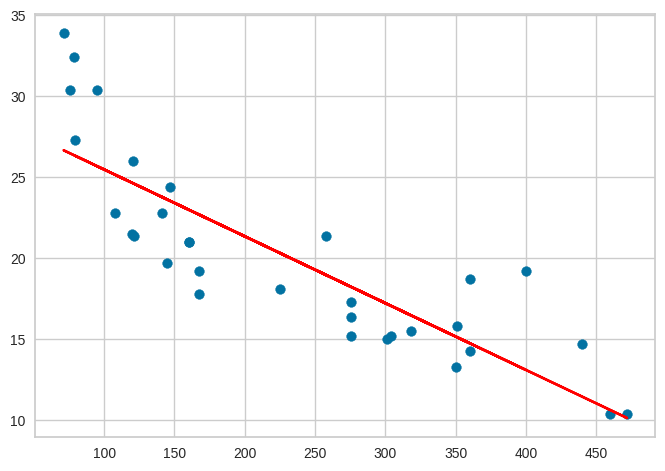

In [20]:
#Grafico com os pontos reais e as previsões
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color='red')
plt.show()

Previsão de um automovel que tem 200 cilindradas, quantas milhas fará: [21.35683076]


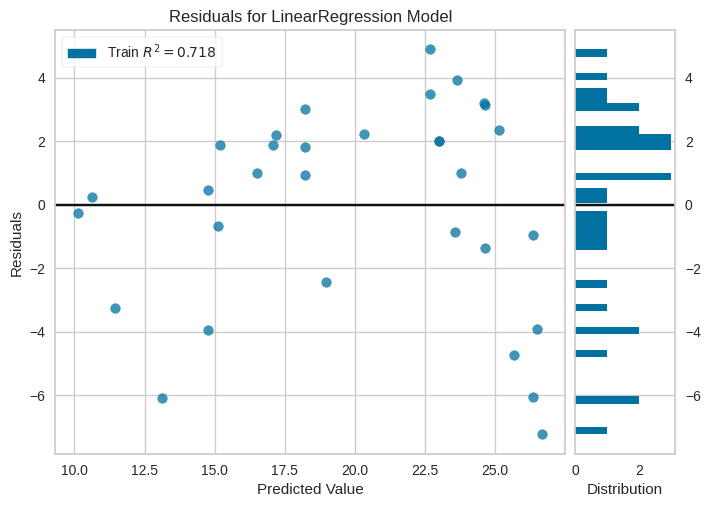

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [19]:
print(f'Previsão de um automovel que tem 200 cilindradas, quantas milhas fará: {modelo.predict([[200]])}')

visualizador = ResidualsPlot(modelo)
visualizador.fit(x,y)
visualizador.poof()

In [21]:
modelo_ajustado = sm.ols(formula= 'mpg ~ disp', data=dados)
modelo_treinado = modelo_ajustado.fit()
print(modelo_treinado.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           9.38e-10
Time:                        15:05:59   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.0